<a href="https://colab.research.google.com/github/SuperScanDev/SuperScan/blob/ML/ML%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Library
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image

import sys
import pathlib
from google.colab import files

In [2]:
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Search and load a zip file
file_list = drive.ListFile({'q':"title='Dataset.zip'"}).GetList()[0]['id']
file1 = drive.CreateFile({'id': file_list})
file1.GetContentFile('Dataset.zip')

In [4]:
# Unzip files
!unzip Dataset.zip

Archive:  Dataset.zip
  inflating: Dataset/Testing/Larutan Cap Badak Kaleng Rasa Leci 320 ml/IMG_E9708.JPG  
  inflating: Dataset/Testing/Teh Sosro Celup/IMG_E9300.JPG  
  inflating: Dataset/Testing/Rojukiss Jeju Lotus Serum/IMG_E9339.JPG  
  inflating: Dataset/Testing/Teh Sosro Celup/IMG_E9298.JPG  
  inflating: Dataset/Testing/Garnier Micellar Water/IMG_E9521.JPG  
  inflating: Dataset/Testing/Larutan Cap Badak Kaleng Rasa Leci 320 ml/IMG_E9706.JPG  
  inflating: Dataset/Testing/Teh Sosro Celup/IMG_E9301.JPG  
  inflating: Dataset/Training/Jawara Saus Sambal/IMG_E9433.JPG  
  inflating: Dataset/Testing/Garnier Micellar Water/IMG_E9518.JPG  
  inflating: Dataset/Training/Jawara Saus Sambal/IMG_E9434.JPG  
  inflating: Dataset/Testing/Rojukiss Jeju Lotus Serum/IMG_E9341.JPG  
  inflating: Dataset/Testing/Rojukiss Jeju Lotus Serum/IMG_E9340.JPG  
  inflating: Dataset/Testing/Jawara Saus Sambal/IMG_E9439.JPG  
  inflating: Dataset/Testing/Garnier Micellar Water/IMG_E9520.JPG  
  inflatin

In [5]:
# Create directories and list files
path = '/content/Dataset'
os.listdir(path)

['Testing', 'Training']

In [6]:
# Directory with training and testing images
training_dir = os.path.join(path,'Training')
testing_dir = os.path.join(path,'Testing')

In [7]:
# Directory with training images of each product
training_ABCSardinesSausTomat_dir = os.path.join(training_dir,
                                   'ABC Sardines Saus Tomat')
training_Bagus50Gr2PcsSibiruPembersihKloset_dir = os.path.join(training_dir,
                               'Bagus 50 Gr 2 Pcs Sibiru Pembersih Kloset')
training_BangoKecapManis550ml_dir = os.path.join(training_dir,
                                'Bango Kecap Manis 550ml')
training_BayfreshPopScentPretty_dir = os.path.join(training_dir,
                                   'Bayfresh Pop Scent Pretty')
training_BaygonWangiFlowerGarden_dir = os.path.join(training_dir,
                                'Baygon Wangi Flower Garden')
training_BioreBodyFoamLovelySakura_dir = os.path.join(training_dir,
                                   'Biore Body Foam Lovely Sakura')
training_BlueBandSerbaguna200g_dir = os.path.join(training_dir,
                               'Blue Band Serbaguna 200g')
training_BonCabelevel10_dir = os.path.join(training_dir,
                                'BonCabe level 10')
training_CarasunSolarSmartUVProtector30ml_dir = os.path.join(training_dir,
                                   'Carasun Solar Smart UV Protector 30 ml')
training_ChocoPieMarshmallow_dir = os.path.join(training_dir,
                                'Choco Pie Marshmallow')
training_CLEARHijabPure300ml_dir = os.path.join(training_dir,
                                   'CLEAR Hijab Pure 300ml')
training_CocaCola_dir = os.path.join(training_dir,
                               'Coca Cola 1.5 L')
training_DandangJasmineTea_dir = os.path.join(training_dir,
                                'Dandang Jasmine Tea')
training_TehSosroCelup_dir = os.path.join(training_dir,
                                   'Teh Sosro Celup')
training_JohnsonsBabyBlossomSoap_dir = os.path.join(training_dir,
                                'Johnsons Baby Blossom Soap')
training_KecapInggrisAsiaHarumSedap135ml_dir = os.path.join(training_dir,
                                   'Kecap Inggris Asia Harum Sedap 135 ml')
training_KonicareGelPembersihTangan_dir = os.path.join(training_dir,
                               'Konicare Gel Pembersih Tangan')
training_KraftCheddar_dir = os.path.join(training_dir,
                                'Kraft Cheddar')
training_LaFonteSpaghetti_dir = os.path.join(training_dir,
                                   'La Fonte Spaghetti')
training_MaestroMayonais_dir = os.path.join(training_dir,
                                'Maestro Mayonais')
training_MakarizoHairEnergy100ml_dir = os.path.join(training_dir,
                                   'Makarizo Hair Energy 100 ml')
training_MamasukaBumbuInstanRendang_dir = os.path.join(training_dir,
                               'Mamasuka Bumbu Instan Rendang')
training_RojukissJejuLotusSerum_dir = os.path.join(training_dir,
                                'Rojukiss Jeju Lotus Serum')
training_YOUToneUpUV_dir = os.path.join(training_dir,
                                   'YOU Tone Up UV')
training_MieTelorCapAyam2Telor_dir = os.path.join(training_dir,
                                'Mie Telor Cap Ayam 2 Telor')
training_MinyakKayuPutihCapLang210ml_dir = os.path.join(training_dir,
                                   'Minyak Kayu Putih Cap Lang 210ml')
training_MirandaHairColorDarkBrown_dir = os.path.join(training_dir,
                               'Miranda Hair Color Dark Brown')
training_JawaraSausSambal_dir = os.path.join(training_dir,
                                'Jawara Saus Sambal')
training_NescafeLatte_dir = os.path.join(training_dir,
                                   'Nescafe Latte')
training_NuvoActiveCleanCharcoal_dir = os.path.join(training_dir,
                                'Nuvo Active Clean Charcoal')
training_NuvoAntisepticWetWipesOriginal_dir = os.path.join(training_dir,
                                   'Nuvo Antiseptic Wet Wipes Original')
training_PolytexSabutSponAntiGores_dir = os.path.join(training_dir,
                                'Polytex Sabut Spon Anti Gores')
training_PringlesCheesyCheese_dir = os.path.join(training_dir,
                                'Pringles Cheesy Cheese')
training_SabunLifebuoyCoolFresh_dir = os.path.join(training_dir,
                               'Sabun Lifebuoy Cool Fresh')
training_GarnierMicellarWater_dir = os.path.join(training_dir,
                                'Garnier Micellar Water')
training_SaniaTepungTerigu_dir = os.path.join(training_dir,
                                   'Sania Tepung Terigu')
training_SiipNabati_dir = os.path.join(training_dir,
                                'Siip Nabati')
training_LarutanCapBadakKalengRasaLeci320ml_dir = os.path.join(training_dir,
                                   'Larutan Cap Badak Kaleng Rasa Leci 320 ml')
training_SasaSantanKelapa_dir = os.path.join(training_dir,
                               'Sasa Santan Kelapa')
training_SelsunGold125ml_dir = os.path.join(training_dir,
                                'Selsun Gold 125 ml')
training_SidomunculEsteEmjeGingsengOriginal_dir = os.path.join(training_dir,
                                   'Sidomuncul Este Emje + Gingseng Original')
training_SkinAquaUVWhiteningMilk_dir = os.path.join(training_dir,
                                'Skin Aqua UV Whitening Milk')
training_ShinzuiLighteningSoap_dir = os.path.join(training_dir,
                                   'Shinzui Lightening Soap')
training_SoKlinLantaiCitrusLemon_dir = os.path.join(training_dir,
                               'So Klin Lantai Citrus Lemon')
training_Sunlight2in1KrimBubukPembersih_dir = os.path.join(training_dir,
                                'Sunlight 2in1 Krim+Bubuk Pembersih')
training_TotoleKalduJamur80g_dir = os.path.join(training_dir,
                                   'Totole Kaldu Jamur 80g')
training_VanHoutenCocoaPowder_dir = os.path.join(training_dir,
                                'Van Houten Cocoa Powder')
training_VaselineHealthyBright_dir = os.path.join(training_dir,
                                   'Vaseline Healthy Bright')
training_WipolKarbolCemara_dir = os.path.join(training_dir,
                               'Wipol Karbol Cemara')
training_GeryBischoc_dir = os.path.join(training_dir,
                                'Gery Bischoc')

In [8]:
# Directory with testing images of each product
testing_ABCSardinesSausTomat_dir = os.path.join(testing_dir,
                               'ABC Sardines Saus Tomat')
testing_Bagus50Gr2PcsSibiruPembersihKloset_dir = os.path.join(testing_dir,
                                  'Bagus 50 Gr 2 Pcs Sibiru Pembersih Kloset')
testing_BangoKecapManis550ml_dir = os.path.join(testing_dir,
                              'Bango Kecap Manis 550ml')
testing_BayfreshPopScentPretty_dir = os.path.join(testing_dir,
                               'Bayfresh Pop Scent Pretty')
testing_BaygonWangiFlowerGarden_dir = os.path.join(testing_dir,
                                  'Baygon Wangi Flower Garden')
testing_BioreBodyFoamLovelySakura_dir = os.path.join(testing_dir,
                               'Biore Body Foam Lovely Sakura')
testing_BlueBandSerbaguna200g_dir = os.path.join(testing_dir,
                                  'Blue Band Serbaguna 200g')
testing_BonCabelevel10_dir = os.path.join(testing_dir,
                              'BonCabe level 10')
testing_CarasunSolarSmartUVProtector30ml_dir = os.path.join(testing_dir,
                               'Carasun Solar Smart UV Protector 30 ml')
testing_ChocoPieMarshmallow_dir = os.path.join(testing_dir,
                                  'Choco Pie Marshmallow')
testing_CLEARHijabPure300ml_dir = os.path.join(testing_dir,
                                   'CLEAR Hijab Pure 300ml')
testing_CocaCola_dir = os.path.join(testing_dir,
                               'Coca Cola 1.5 L')
testing_DandangJasmineTea_dir = os.path.join(testing_dir,
                                'Dandang Jasmine Tea')
testing_TehSosroCelup_dir = os.path.join(testing_dir,
                                   'Teh Sosro Celup')
testing_JohnsonsBabyBlossomSoap_dir = os.path.join(testing_dir,
                                'Johnsons Baby Blossom Soap')
testing_KecapInggrisAsiaHarumSedap135ml_dir = os.path.join(testing_dir,
                                   'Kecap Inggris Asia Harum Sedap 135 ml')
testing_KonicareGelPembersihTangan_dir = os.path.join(testing_dir,
                               'Konicare Gel Pembersih Tangan')
testing_KraftCheddar_dir = os.path.join(testing_dir,
                                'Kraft Cheddar')
testing_LaFonteSpaghetti_dir = os.path.join(testing_dir,
                                   'La Fonte Spaghetti')
testing_MaestroMayonais_dir = os.path.join(testing_dir,
                                'Maestro Mayonais')
testing_MakarizoHairEnergy100ml_dir = os.path.join(testing_dir,
                                   'Makarizo Hair Energy 100 ml')
testing_MamasukaBumbuInstanRendang_dir = os.path.join(testing_dir,
                               'Mamasuka Bumbu Instan Rendang')
testing_RojukissJejuLotusSerum_dir = os.path.join(testing_dir,
                                'Rojukiss Jeju Lotus Serum')
testing_YOUToneUpUV_dir = os.path.join(testing_dir,
                                   'YOU Tone Up UV')
testing_MieTelorCapAyam2Telor_dir = os.path.join(testing_dir,
                                'Mie Telor Cap Ayam 2 Telor')
testing_MinyakKayuPutihCapLang210ml_dir = os.path.join(testing_dir,
                                   'Minyak Kayu Putih Cap Lang 210ml')
testing_MirandaHairColorDarkBrown_dir = os.path.join(testing_dir,
                               'Miranda Hair Color Dark Brown')
testing_JawaraSausSambal_dir = os.path.join(testing_dir,
                                'Jawara Saus Sambal')
testing_NescafeLatte_dir = os.path.join(testing_dir,
                                   'Nescafe Latte')
testing_NuvoActiveCleanCharcoal_dir = os.path.join(testing_dir,
                                'Nuvo Active Clean Charcoal')
testing_NuvoAntisepticWetWipesOriginal_dir = os.path.join(testing_dir,
                                   'Nuvo Antiseptic Wet Wipes Original')
testing_PolytexSabutSponAntiGores_dir = os.path.join(testing_dir,
                                'Polytex Sabut Spon Anti Gores')
testing_PringlesCheesyCheese_dir = os.path.join(testing_dir,
                                'Pringles Cheesy Cheese')
testing_SabunLifebuoyCoolFresh_dir = os.path.join(testing_dir,
                               'Sabun Lifebuoy Cool Fresh')
testing_GarnierMicellarWater_dir = os.path.join(testing_dir,
                                'Garnier Micellar Water')
testing_SaniaTepungTerigu_dir = os.path.join(testing_dir,
                                   'Sania Tepung Terigu')
testing_SiipNabati_dir = os.path.join(testing_dir,
                                'Siip Nabati')
testing_LarutanCapBadakKalengRasaLeci320ml_dir = os.path.join(testing_dir,
                                   'Larutan Cap Badak Kaleng Rasa Leci 320 ml')
testing_SasaSantanKelapa_dir = os.path.join(testing_dir,
                               'Sasa Santan Kelapa')
testing_SelsunGold125ml_dir = os.path.join(testing_dir,
                                'Selsun Gold 125 ml')
testing_SidomunculEsteEmjeGingsengOriginal_dir = os.path.join(testing_dir,
                                   'Sidomuncul Este Emje + Gingseng Original')
testing_SkinAquaUVWhiteningMilk_dir = os.path.join(testing_dir,
                                'Skin Aqua UV Whitening Milk')
testing_ShinzuiLighteningSoap_dir = os.path.join(testing_dir,
                                   'Shinzui Lightening Soap')
testing_SoKlinLantaiCitrusLemon_dir = os.path.join(testing_dir,
                               'So Klin Lantai Citrus Lemon')
testing_Sunlight2in1KrimBubukPembersih_dir = os.path.join(testing_dir,
                                'Sunlight 2in1 Krim+Bubuk Pembersih')
testing_TotoleKalduJamur80g_dir = os.path.join(testing_dir,
                                   'Totole Kaldu Jamur 80g')
testing_VanHoutenCocoaPowder_dir = os.path.join(testing_dir,
                                'Van Houten Cocoa Powder')
testing_VaselineHealthyBright_dir = os.path.join(testing_dir,
                                   'Vaseline Healthy Bright')
testing_WipolKarbolCemara_dir = os.path.join(testing_dir,
                               'Wipol Karbol Cemara')
testing_GeryBischoc_dir = os.path.join(testing_dir,
                                'Gery Bischoc')

In [9]:
# List files with training images of each product
num_ABCSardinesSausTomat_training = len(os.listdir(training_ABCSardinesSausTomat_dir))
num_Bagus50Gr2PcsSibiruPembersihKloset_training = len(os.listdir(training_Bagus50Gr2PcsSibiruPembersihKloset_dir))
num_BangoKecapManis550ml_training = len(os.listdir(training_BangoKecapManis550ml_dir))
num_BayfreshPopScentPretty_training = len(os.listdir(training_BayfreshPopScentPretty_dir))
num_BaygonWangiFlowerGarden_training = len(os.listdir(training_BaygonWangiFlowerGarden_dir))
num_BioreBodyFoamLovelySakura_training = len(os.listdir(training_BioreBodyFoamLovelySakura_dir))
num_BlueBandSerbaguna200g_training = len(os.listdir(training_BlueBandSerbaguna200g_dir))
num_BonCabelevel10_training = len(os.listdir(training_BonCabelevel10_dir))
num_CarasunSolarSmartUVProtector30ml_training = len(os.listdir(training_CarasunSolarSmartUVProtector30ml_dir))
num_ChocoPieMarshmallow_training = len(os.listdir(training_ChocoPieMarshmallow_dir))
num_CLEARHijabPure300ml_training = len(os.listdir(training_CLEARHijabPure300ml_dir))
num_CocaCola_training = len(os.listdir(training_CocaCola_dir))
num_DandangJasmineTea_training = len(os.listdir(training_DandangJasmineTea_dir))
num_TehSosroCelup_training = len(os.listdir(training_TehSosroCelup_dir))
num_JohnsonsBabyBlossomSoap_training = len(os.listdir(training_JohnsonsBabyBlossomSoap_dir))
num_KecapInggrisAsiaHarumSedap135ml_training = len(os.listdir(training_KecapInggrisAsiaHarumSedap135ml_dir))
num_KonicareGelPembersihTangan_training = len(os.listdir(training_KonicareGelPembersihTangan_dir))
num_KraftCheddar_training = len(os.listdir(training_KraftCheddar_dir))
num_LaFonteSpaghetti_training = len(os.listdir(training_LaFonteSpaghetti_dir))
num_MaestroMayonais_training = len(os.listdir(training_MaestroMayonais_dir))
num_MakarizoHairEnergy100ml_training = len(os.listdir(training_MakarizoHairEnergy100ml_dir))
num_MamasukaBumbuInstanRendang_training = len(os.listdir(training_MamasukaBumbuInstanRendang_dir))
num_RojukissJejuLotusSerum_training = len(os.listdir(training_RojukissJejuLotusSerum_dir))
num_YOUToneUpUV_training = len(os.listdir(training_YOUToneUpUV_dir))
num_MieTelorCapAyam2Telor_training = len(os.listdir(training_MieTelorCapAyam2Telor_dir))
num_MinyakKayuPutihCapLang210ml_training = len(os.listdir(training_MinyakKayuPutihCapLang210ml_dir))
num_MirandaHairColorDarkBrown_training = len(os.listdir(training_MirandaHairColorDarkBrown_dir))
num_JawaraSausSambal_training = len(os.listdir(training_JawaraSausSambal_dir))
num_NescafeLatte_training = len(os.listdir(training_NescafeLatte_dir))
num_NuvoActiveCleanCharcoal_training = len(os.listdir(training_NuvoActiveCleanCharcoal_dir))
num_NuvoAntisepticWetWipesOriginal_training = len(os.listdir(training_NuvoAntisepticWetWipesOriginal_dir))
num_PolytexSabutSponAntiGores_training = len(os.listdir(training_PolytexSabutSponAntiGores_dir))
num_PringlesCheesyCheese_training = len(os.listdir(training_PringlesCheesyCheese_dir))
num_SabunLifebuoyCoolFresh_training = len(os.listdir(training_SabunLifebuoyCoolFresh_dir))
num_GarnierMicellarWater_training = len(os.listdir(training_GarnierMicellarWater_dir))
num_SaniaTepungTerigu_training = len(os.listdir(training_SaniaTepungTerigu_dir))
num_SiipNabati_training = len(os.listdir(training_SiipNabati_dir))
num_LarutanCapBadakKalengRasaLeci320ml_training = len(os.listdir(training_LarutanCapBadakKalengRasaLeci320ml_dir))
num_SasaSantanKelapa_training = len(os.listdir(training_SasaSantanKelapa_dir))
num_SelsunGold125ml_training = len(os.listdir(training_SelsunGold125ml_dir))
num_SidomunculEsteEmjeGingsengOriginal_training = len(os.listdir(training_SidomunculEsteEmjeGingsengOriginal_dir))
num_SkinAquaUVWhiteningMilk_training = len(os.listdir(training_SkinAquaUVWhiteningMilk_dir))
num_ShinzuiLighteningSoap_training = len(os.listdir(training_ShinzuiLighteningSoap_dir))
num_SoKlinLantaiCitrusLemon_training = len(os.listdir(training_SoKlinLantaiCitrusLemon_dir))
num_Sunlight2in1KrimBubukPembersih_training = len(os.listdir(training_Sunlight2in1KrimBubukPembersih_dir))
num_TotoleKalduJamur80g_training = len(os.listdir(training_TotoleKalduJamur80g_dir))
num_VanHoutenCocoaPowder_training = len(os.listdir(training_VanHoutenCocoaPowder_dir))
num_VaselineHealthyBright_training = len(os.listdir(training_VaselineHealthyBright_dir))
num_WipolKarbolCemara_training = len(os.listdir(training_WipolKarbolCemara_dir))
num_GeryBischoc_training = len(os.listdir(training_GeryBischoc_dir))

# Total files in training images
total_training = num_ABCSardinesSausTomat_training + num_Bagus50Gr2PcsSibiruPembersihKloset_training + num_BangoKecapManis550ml_training + num_BayfreshPopScentPretty_training + num_BaygonWangiFlowerGarden_training + num_BioreBodyFoamLovelySakura_training + num_BlueBandSerbaguna200g_training + num_BonCabelevel10_training + num_CarasunSolarSmartUVProtector30ml_training + num_ChocoPieMarshmallow_training + num_CLEARHijabPure300ml_training + num_CocaCola_training + num_DandangJasmineTea_training + num_TehSosroCelup_training + num_JohnsonsBabyBlossomSoap_training + num_KecapInggrisAsiaHarumSedap135ml_training + num_KonicareGelPembersihTangan_training + num_KraftCheddar_training + num_LaFonteSpaghetti_training + num_MaestroMayonais_training + num_MakarizoHairEnergy100ml_training + num_MamasukaBumbuInstanRendang_training + num_RojukissJejuLotusSerum_training + num_YOUToneUpUV_training + num_MieTelorCapAyam2Telor_training + num_MinyakKayuPutihCapLang210ml_training + num_MirandaHairColorDarkBrown_training + num_JawaraSausSambal_training + num_NescafeLatte_training + num_NuvoActiveCleanCharcoal_training + num_NuvoAntisepticWetWipesOriginal_training + num_PolytexSabutSponAntiGores_training + num_SaniaTepungTerigu_training + num_GarnierMicellarWater_training + num_PringlesCheesyCheese_training +  num_SabunLifebuoyCoolFresh_training + num_SiipNabati_training + num_LarutanCapBadakKalengRasaLeci320ml_training + num_SasaSantanKelapa_training + num_SelsunGold125ml_training + num_SidomunculEsteEmjeGingsengOriginal_training + num_SkinAquaUVWhiteningMilk_training + num_ShinzuiLighteningSoap_training + num_SoKlinLantaiCitrusLemon_training + num_Sunlight2in1KrimBubukPembersih_training + num_TotoleKalduJamur80g_training + num_VanHoutenCocoaPowder_training + num_VaselineHealthyBright_training + num_WipolKarbolCemara_training + num_GeryBischoc_training

In [10]:
# List files with testing images of each product
num_ABCSardinesSausTomat_testing = len(os.listdir(testing_ABCSardinesSausTomat_dir))
num_Bagus50Gr2PcsSibiruPembersihKloset_testing = len(os.listdir(testing_Bagus50Gr2PcsSibiruPembersihKloset_dir))
num_BangoKecapManis550ml_testing = len(os.listdir(testing_BangoKecapManis550ml_dir))
num_BayfreshPopScentPretty_testing = len(os.listdir(testing_BayfreshPopScentPretty_dir))
num_BaygonWangiFlowerGarden_testing = len(os.listdir(testing_BaygonWangiFlowerGarden_dir))
num_BioreBodyFoamLovelySakura_testing = len(os.listdir(testing_BioreBodyFoamLovelySakura_dir))
num_BlueBandSerbaguna200g_testing = len(os.listdir(testing_BlueBandSerbaguna200g_dir))
num_BonCabelevel10_testing = len(os.listdir(testing_BonCabelevel10_dir))
num_CarasunSolarSmartUVProtector30ml_testing = len(os.listdir(testing_CarasunSolarSmartUVProtector30ml_dir))
num_ChocoPieMarshmallow_testing = len(os.listdir(testing_ChocoPieMarshmallow_dir))
num_CLEARHijabPure300ml_testing = len(os.listdir(testing_CLEARHijabPure300ml_dir))
num_CocaCola_testing = len(os.listdir(testing_CocaCola_dir))
num_DandangJasmineTea_testing = len(os.listdir(testing_DandangJasmineTea_dir))
num_TehSosroCelup_testing = len(os.listdir(testing_TehSosroCelup_dir))
num_JohnsonsBabyBlossomSoap_testing = len(os.listdir(testing_JohnsonsBabyBlossomSoap_dir))
num_KecapInggrisAsiaHarumSedap135ml_testing = len(os.listdir(testing_KecapInggrisAsiaHarumSedap135ml_dir))
num_KonicareGelPembersihTangan_testing = len(os.listdir(testing_KonicareGelPembersihTangan_dir))
num_KraftCheddar_testing = len(os.listdir(testing_KraftCheddar_dir))
num_LaFonteSpaghetti_testing = len(os.listdir(testing_LaFonteSpaghetti_dir))
num_MaestroMayonais_testing = len(os.listdir(testing_MaestroMayonais_dir))
num_MakarizoHairEnergy100ml_testing = len(os.listdir(testing_MakarizoHairEnergy100ml_dir))
num_MamasukaBumbuInstanRendang_testing = len(os.listdir(testing_MamasukaBumbuInstanRendang_dir))
num_RojukissJejuLotusSerum_testing = len(os.listdir(testing_RojukissJejuLotusSerum_dir))
num_YOUToneUpUV_testing = len(os.listdir(testing_YOUToneUpUV_dir))
num_MieTelorCapAyam2Telor_testing = len(os.listdir(testing_MieTelorCapAyam2Telor_dir))
num_MinyakKayuPutihCapLang210ml_testing = len(os.listdir(testing_MinyakKayuPutihCapLang210ml_dir))
num_MirandaHairColorDarkBrown_testing = len(os.listdir(testing_MirandaHairColorDarkBrown_dir))
num_JawaraSausSambal_testing = len(os.listdir(testing_JawaraSausSambal_dir))
num_NescafeLatte_testing = len(os.listdir(testing_NescafeLatte_dir))
num_NuvoActiveCleanCharcoal_testing = len(os.listdir(testing_NuvoActiveCleanCharcoal_dir))
num_NuvoAntisepticWetWipesOriginal_testing = len(os.listdir(testing_NuvoAntisepticWetWipesOriginal_dir))
num_PolytexSabutSponAntiGores_testing = len(os.listdir(testing_PolytexSabutSponAntiGores_dir))
num_PringlesCheesyCheese_testing = len(os.listdir(testing_PringlesCheesyCheese_dir))
num_SabunLifebuoyCoolFresh_testing = len(os.listdir(testing_SabunLifebuoyCoolFresh_dir))
num_GarnierMicellarWater_testing = len(os.listdir(testing_GarnierMicellarWater_dir))
num_SaniaTepungTerigu_testing = len(os.listdir(testing_SaniaTepungTerigu_dir))
num_SiipNabati_testing = len(os.listdir(testing_SiipNabati_dir))
num_LarutanCapBadakKalengRasaLeci320ml_testing = len(os.listdir(testing_LarutanCapBadakKalengRasaLeci320ml_dir))
num_SasaSantanKelapa_testing = len(os.listdir(testing_SasaSantanKelapa_dir))
num_SelsunGold125ml_testing = len(os.listdir(testing_SelsunGold125ml_dir))
num_SidomunculEsteEmjeGingsengOriginal_testing = len(os.listdir(testing_SidomunculEsteEmjeGingsengOriginal_dir))
num_SkinAquaUVWhiteningMilk_testing = len(os.listdir(testing_SkinAquaUVWhiteningMilk_dir))
num_ShinzuiLighteningSoap_testing = len(os.listdir(testing_ShinzuiLighteningSoap_dir))
num_SoKlinLantaiCitrusLemon_testing = len(os.listdir(testing_SoKlinLantaiCitrusLemon_dir))
num_Sunlight2in1KrimBubukPembersih_testing = len(os.listdir(testing_Sunlight2in1KrimBubukPembersih_dir))
num_TotoleKalduJamur80g_testing = len(os.listdir(testing_TotoleKalduJamur80g_dir))
num_VanHoutenCocoaPowder_testing = len(os.listdir(testing_VanHoutenCocoaPowder_dir))
num_VaselineHealthyBright_testing = len(os.listdir(testing_VaselineHealthyBright_dir))
num_WipolKarbolCemara_testing = len(os.listdir(testing_WipolKarbolCemara_dir))
num_GeryBischoc_testing = len(os.listdir(testing_GeryBischoc_dir))


# Total files in testing images
total_testing = num_ABCSardinesSausTomat_testing + num_Bagus50Gr2PcsSibiruPembersihKloset_testing + num_BangoKecapManis550ml_testing + num_BayfreshPopScentPretty_testing + num_BaygonWangiFlowerGarden_testing + num_BioreBodyFoamLovelySakura_testing + num_BlueBandSerbaguna200g_testing + num_BonCabelevel10_testing + num_CarasunSolarSmartUVProtector30ml_testing + num_ChocoPieMarshmallow_testing + num_CLEARHijabPure300ml_testing + num_CocaCola_testing + num_DandangJasmineTea_testing + num_TehSosroCelup_testing + num_JohnsonsBabyBlossomSoap_testing + num_KecapInggrisAsiaHarumSedap135ml_testing + num_KonicareGelPembersihTangan_testing + num_KraftCheddar_testing + num_LaFonteSpaghetti_testing + num_MaestroMayonais_testing + num_MakarizoHairEnergy100ml_testing + num_MamasukaBumbuInstanRendang_testing + num_RojukissJejuLotusSerum_testing + num_YOUToneUpUV_testing + num_MieTelorCapAyam2Telor_testing + num_MinyakKayuPutihCapLang210ml_testing + num_MirandaHairColorDarkBrown_testing + num_JawaraSausSambal_testing + num_NescafeLatte_testing + num_NuvoActiveCleanCharcoal_testing + num_NuvoAntisepticWetWipesOriginal_testing + num_PolytexSabutSponAntiGores_testing + num_GarnierMicellarWater_testing + num_SaniaTepungTerigu_testing + num_PringlesCheesyCheese_testing +  num_SabunLifebuoyCoolFresh_testing + num_SiipNabati_testing + num_LarutanCapBadakKalengRasaLeci320ml_testing + num_SasaSantanKelapa_testing + num_SelsunGold125ml_testing + num_SidomunculEsteEmjeGingsengOriginal_testing + num_SkinAquaUVWhiteningMilk_testing + num_ShinzuiLighteningSoap_testing + num_SoKlinLantaiCitrusLemon_testing + num_Sunlight2in1KrimBubukPembersih_testing + num_TotoleKalduJamur80g_testing + num_VanHoutenCocoaPowder_testing + num_VaselineHealthyBright_testing + num_WipolKarbolCemara_testing + num_GeryBischoc_testing

In [11]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(50, activation='softmax')
])

In [12]:
# Training parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# Data augmentation
training_datagen = ImageDataGenerator(
      rescale=1.0/255.0,
      rotation_range=40.0,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

testing_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow training images
training_generator = training_datagen.flow_from_directory(
        training_dir,
        target_size=(300, 300),
        batch_size=128,
        class_mode='categorical')

# Flow testing images
testing_generator = testing_datagen.flow_from_directory(
        testing_dir,
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical')

Found 800 images belonging to 50 classes.
Found 200 images belonging to 50 classes.


In [14]:
# Constant for epochs
EPOCHS = 16

# Train the model
history = model.fit(
      training_generator,
      steps_per_epoch = total_training // 128,  
      epochs = EPOCHS,
      verbose=1,
      validation_data = testing_generator,
      validation_steps = total_testing // 128
      )

Epoch 1/16
6/6 [==============================] - 195s 31s/step - loss: 3.9059 - accuracy: 0.0182 - val_loss: 3.6324 - val_accuracy: 0.0938
Epoch 2/16
6/6 [==============================] - 171s 32s/step - loss: 3.6813 - accuracy: 0.0372 - val_loss: 3.5368 - val_accuracy: 0.0625
Epoch 3/16
6/6 [==============================] - 183s 30s/step - loss: 3.3599 - accuracy: 0.0833 - val_loss: 2.8555 - val_accuracy: 0.2188
Epoch 4/16
6/6 [==============================] - 182s 30s/step - loss: 2.9363 - accuracy: 0.1745 - val_loss: 2.0779 - val_accuracy: 0.4062
Epoch 5/16
6/6 [==============================] - 171s 28s/step - loss: 2.6547 - accuracy: 0.2693 - val_loss: 1.8686 - val_accuracy: 0.5938
Epoch 6/16
6/6 [==============================] - 168s 27s/step - loss: 2.4827 - accuracy: 0.3021 - val_loss: 1.8692 - val_accuracy: 0.4062
Epoch 7/16
6/6 [==============================] - 162s 26s/step - loss: 2.3094 - accuracy: 0.3482 - val_loss: 1.5896 - val_accuracy: 0.5938
Epoch 8/16
6/6 [====

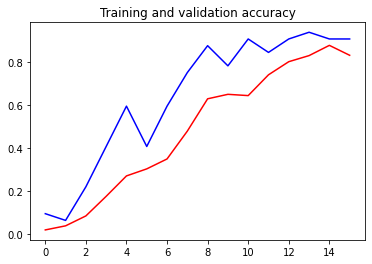

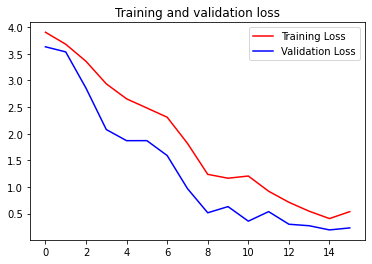

In [15]:
# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  
  print(fn)
  print(classes)

class_names = ['ABC Sardines Saus Tomat',
     'Bagus 50 Gr 2 Pcs Sibiru Pembersih Kloset',
     'Bango Kecap Manis 550ml',
     'Bayfresh Pop Scent Pretty',
     'Baygon Wangi Flower Garden',
     'Biore Body Foam Lovely Sakura',
     'Blue Band Serbaguna 200g',
     'BonCabe level 10', 
     'Carasun Solar Smart UV Protector 30 ml', 
     'Choco Pie Marshmallow', 
     'CLEAR Hijab Pure 300ml', 
     'Coca Cola 1.5 L', 
     'Dandang Jasmine Tea', 
     'Teh Sosro Celup', 
     'Johnsons Baby Blossom Soap',
     'Kecap Inggris Asia Harum Sedap 135 ml', 
     'Konicare Gel Pembersih Tangan', 
     'Kraft Cheddar', 
     'La Fonte Spaghetti',
     'Maestro Mayonais', 
     'Makarizo Hair Energy 100 ml', 
     'Mamasuka Bumbu Instan Rendang', 
     'Rojukiss Jeju Lotus Serum',
     'YOU Tone Up UV Goreng', 
     'Mie Telor Cap Ayam 2 Telor', 
     'Minyak Kayu Putih Cap Lang 210ml', 
     'Miranda Hair Color Dark Brown', 
     'Jawara Saus Sambal', 
     'Nescafe Latte', 
     'Nuvo Active Clean Charcoal', 
     'Nuvo Antiseptic Wet Wipes Original', 
     'Polytex Sabut Spon Anti Gores', 
     'Pringles Cheesy Cheese', 
     'Sabun Lifebuoy Cool Fresh', 
     'Garnier Micellar Water', 
     'Sania Tepung Terigu', 
     'Siip Nabati', 
     'Larutan Cap Badak Kaleng Rasa Leci 320 ml', 
     'Sasa Santan Kelapa', 
     'Selsun Gold 125 ml', 
     'Sidomuncul Este Emje + Gingseng Original', 
     'Skin Aqua UV Whitening Milk', 
     'Shinzui Lightening Soap', 
     'So Klin Lantai Citrus Lemon',
     'Sunlight 2in1 Krim+Bubuk Pembersih', 
     'Totole Kaldu Jamur 80g', 
     'Van Houten Cocoa Powder', 
     'Vaseline Healthy Bright', 
     'Wipol Karbol Cemara',
     'Gery Bischoc']
     
class_names[np.argmax(classes)]

Saving ca9d69ac7013c0eb1d988ecfc619345c.jpg to ca9d69ac7013c0eb1d988ecfc619345c.jpg
ca9d69ac7013c0eb1d988ecfc619345c.jpg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


'Bagus 50 Gr 2 Pcs Sibiru Pembersih Kloset'

In [17]:
# Export to TFLite
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [18]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [19]:
converter =tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter.optimizations = [optimization]

tflite_model = converter.convert()

In [20]:
tflite_model_file = pathlib.Path('./SuperScan.tflite')
tflite_model_file.write_bytes(tflite_model)

1742816

In [21]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [22]:
# Download the TFLite model
files.download('SuperScan.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>